In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from datetime import date

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [2]:
# data imports
borr = pd.read_csv("data/borrow.csv")
dep = pd.read_csv("data/deposit.csv")
flash = pd.read_csv("data/flash.csv")
liq = pd.read_csv("data/liquidation-call.csv")
orig = pd.read_csv("data/origination-fee-liquidation.csv")
red = pd.read_csv("data/redeem-underlyings.csv")
rep = pd.read_csv("data/repay.csv")
usage = pd.read_csv("data/usage-as-collateral.csv")

methods = [borr,dep,flash,liq,orig,red,rep,usage]
methods_names = ["borrow", "deposit", "flash-loan", "liquidation-call", "origination-fee-liquidation", "redeem-underlyings", "repays", "usage-as-collateral"]

# data cleaning, dropping stupid columns

for method in methods:
    method.drop(['Unnamed: 0', 'pool-id', 'method'], axis=1, inplace=True)
    method['date'] =  method['date'].apply(lambda x: x.split(" ")[0])
    method['date'] = method['date'].apply(lambda x: date.fromisoformat(str(x)))
    method['date'] = pd.to_datetime(method['date'])
    method.set_index('date', inplace=True)
    
for i in range(len(methods)):
    print(methods_names[i],": ",methods[i].shape)

borrow :  (1472, 6)
deposit :  (4464, 3)
flash-loan :  (3005, 5)
liquidation-call :  (1045, 5)
origination-fee-liquidation :  (238, 4)
redeem-underlyings :  (5802, 3)
repays :  (1950, 4)
usage-as-collateral :  (33, 4)


In [3]:
# deposit, flash, liquidation-call
dep['amount'] = dep['amount'].apply(lambda x: int(x))
flash['amount'] = flash['amount'].apply(lambda x: int(x))
borr['amount'] = borr['amount'].apply(lambda x: int(x))
liq['principal-amount'] = liq['principal-amount'].apply(lambda x: int(x))
liq['collateral-amount'] = liq['collateral-amount'].apply(lambda x: int(x))
orig['fee-liquidated'] = orig['fee-liquidated'].apply(lambda x: int(x))
orig['liquidated-collateral-for-free'] = orig['liquidated-collateral-for-free'].apply(lambda x: int(x))
red['amount'] = red['amount'].apply(lambda x: int(x))
rep['amount-after-fee'] = rep['amount-after-fee'].apply(lambda x: int(x))

In [4]:
liq.head()

,id,user-id,collateral-amount,principal-amount,liquidator
date,,,,,
2022-06-20,0xe68311207f0d250ff8dea862bc98fd8276f2bc2bb460c3990173feb212d6de78:8,0x5e46f0d1b3e1cf21d584fb557f98eb3ea4a19059,10623087942130237247,4002443350532346942861,0xabcf5d4be599f1c7f71fcbcae4643a2aa849f4c8
2022-06-19,0x44471bbe74dfb00133e2bb5fe5fcef79c53695227e9f56553cafe581ab5ee767:8,0x275b62bb7f616212ff86ea877a0fb846f825ad5b,2993186042740521575,2711194155699475639517,0x4cd62db8e2d78db8138e4d6e0d65cf76ff2a3b85
2022-06-19,0xbd34780ba9409a3567936e309b7167ecb3df6c48946b4f9456ab918e5487b444:8,0xc20f93173e270ecf5f05c72596b4b7bfc020788c,1727057019788805381,1560652113617800171064,0x4cd62db8e2d78db8138e4d6e0d65cf76ff2a3b85
2022-06-19,0xb399e9c6f36a93f9b2b0ddb2c6220dcfcda596b51e8683bd50a485925640a109:8,0xa836e38bab7e5e42a29f42e547ef1663c503543d,1075796466213361620,970576724,0x07197a25bf7297c2c41dd09a79160d05b6232bcf
2022-06-19,0xa839c8a3bbec66d0ee2fc0e40a43184918dc7cdf0edd962fc6a1f8fb1443bd69:8,0xbe9c45d2b35e6786ee02cd9b6e53175477003584,2356341946621904834,2145807805269705627164,0x4cd62db8e2d78db8138e4d6e0d65cf76ff2a3b85


In [185]:
# simple plottings
#plt.rcParams["figure.figsize"] = (12,6)
#plt.plot(dep.groupby(pd.Grouper(freq='D')).mean()['amount'].index, dep.groupby(pd.Grouper(freq='D')).sum()['amount'].values)

In [209]:
for i in range(len(methods)):
    print(methods_names[i],": ",methods[i].shape)

borrow :  (1472, 6)
deposit :  (4464, 3)
flash-loan :  (3005, 5)
liquidation-call :  (1045, 5)
origination-fee-liquidation :  (238, 4)
redeem-underlyings :  (5802, 3)
repays :  (1950, 4)
usage-as-collateral :  (33, 4)


In [261]:
# 1000000000000000 = 1.1611 $
flash.head()

,id,target,amount,total-fee,protocol-fee
date,,,,,
2022-06-14,0x1db48922f846ed3af7e04ee3a413fe7b4893ae631e2b3dc893e5962e06b4c07a:9,0x814076409d7512640dc37d40aadc0e8177830b41,94662863773788923557,85196577396410031,25558973218923009
2022-06-14,0x9e3ce2928af151cb632375b7bcb0d4b8828a42b60e35c0345731622fdb78ed99:9,0x814076409d7512640dc37d40aadc0e8177830b41,94085757791127060072,84677182012014354,25403154603604306
2022-06-14,0xec08a46f66488ab63f34670d8f45d53d1a34870dfec745cae11657d10e6963bb:9,0x814076409d7512640dc37d40aadc0e8177830b41,188590255945113126829,169731230350601814,50919369105180544
2022-03-22,0xa254498fac1ef28d7ca4c7afc7e3ed3a5638399d9f7f064cc1a920c47df431a2:9,0x2634e5d477b80b4578dadc2962336929b5e9ee3a,793984193,714585,214375
2022-03-21,0x4ce1509104bf91579b002476222b63ded46e488766cdb5b14affa9a82bae01f1:9,0x2634e5d477b80b4578dadc2962336929b5e9ee3a,1176074356528526617847,1058466920875673956,317540076262702186


In [385]:
df = pd.read_csv("data/dataframe.csv")

In [390]:
from collections import Counter
shit = dict(Counter(df['method']))
print(shit)

{'borrow': 1472, 'deposit': 4464, 'flash-loan': 3005, 'liquidation-call': 1045, 'origination-fee-liquidation': 1920, 'redeem-underlying': 5802, 'repay': 1950, 'usage-as-collateral': 33}


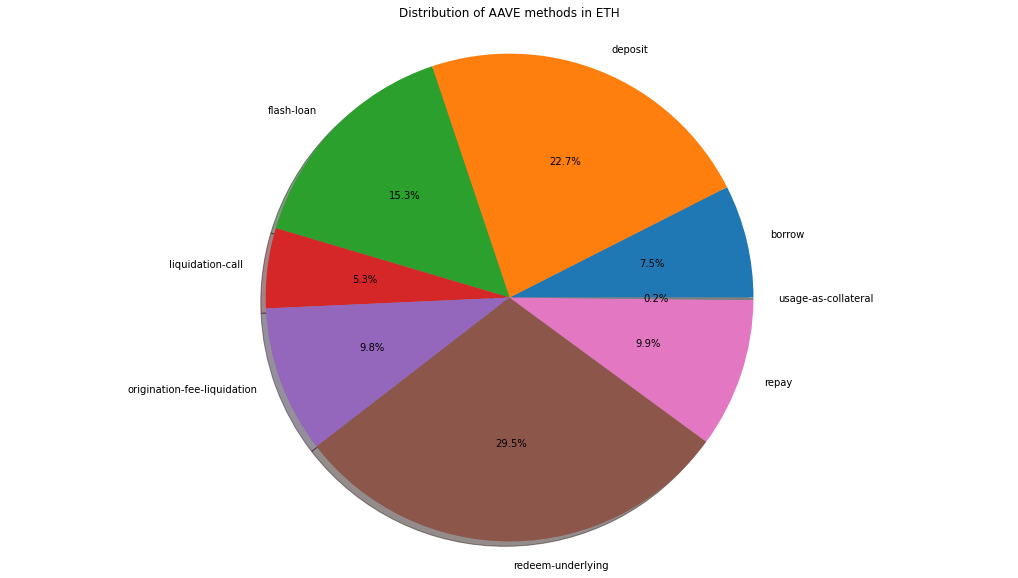

In [393]:
labels = []
sizes = []

for x, y in shit.items():
    labels.append(x)
    sizes.append(y)

# Plot
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
plt.title("Distribution of AAVE methods in ETH")
plt.axis('equal')
plt.show()

In [384]:
df.drop(['Unnamed: 0', 'pool-id'], axis=1, inplace=True)
df['date'] =  df['date'].apply(lambda x: x.split(" ")[0])
df['date'] = df['date'].apply(lambda x: date.fromisoformat(str(x)))
df['date'] = pd.to_datetime(df['date'])

In [371]:
liq = pd.read_csv("data/liquidation-call.csv")
rep = pd.read_csv("data/repay.csv")

In [372]:
liq['amount'] = liq['principal-amount']
rep['amount'] = rep['amount-after-fee']

In [373]:
df.shape

(19691, 20)

In [374]:
df = df[df['method'] != "liquidation-call"]
df = df[df['method'] != "repay"]

In [375]:
df.shape

(16696, 20)

In [376]:
df = df.append(liq)
df = df.append(rep)

In [377]:
df.shape

(19691, 22)

In [378]:
df = df[df['amount'].notna()]

In [328]:
df = df[['date', 'amount']]

In [342]:
df.sort_values('date', ascending=True)

,date,amount
17707,2021-06-14,3900450168149115881
8938,2021-06-14,4995504046358277550204
8937,2021-06-14,19982016185433110200819
8936,2021-06-14,53056782913884184577238
8935,2021-06-14,4000000000000000000
8934,2021-06-14,2224771210415946580
8933,2021-06-14,5007089657978634319220
8932,2021-06-14,3778684791456924973
8931,2021-06-14,87987381277957196694
8930,2021-06-14,7757471726354349344363


C:\Users\User\AppData\Local\Temp/ipykernel_13128/3558100107.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df["date"].groupby(df["date"].dt.week).count().plot(kind="bar")


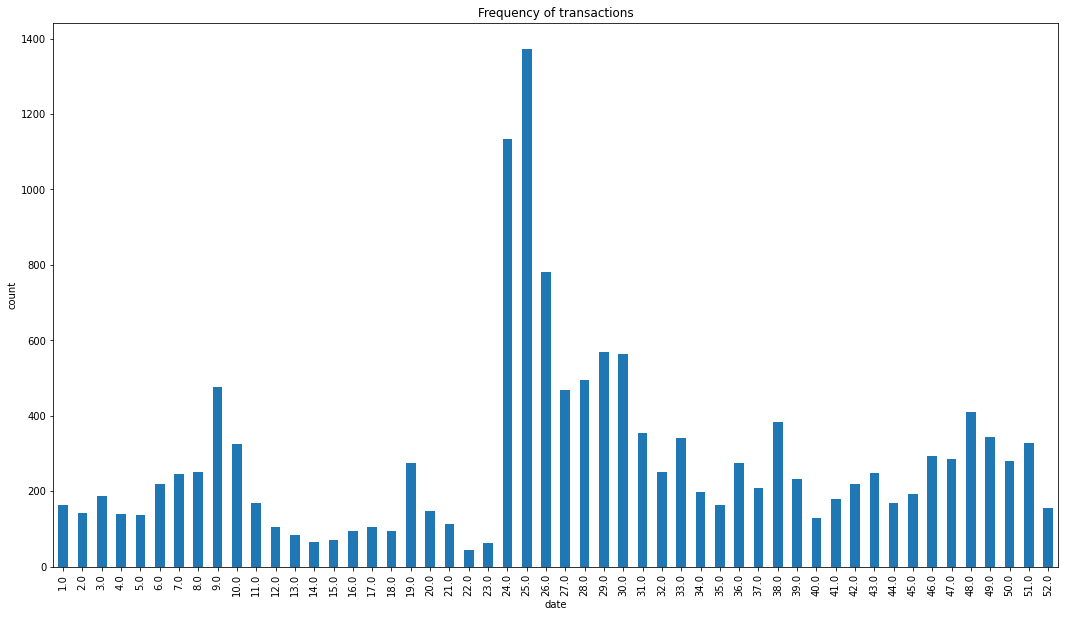

In [349]:
df["date"] = df["date"].astype("datetime64")
df["date"].groupby(df["date"].dt.week).count().plot(kind="bar")
plt.ylabel("")
plt.title("Frequency of transactions")
plt.rcParams["figure.figsize"] = (18,10)

In [354]:
df['amount'] = df['amount'].apply(lambda x: int(x))

In [363]:
df['amount-$'] = (df['amount'] / 1000000000000000000) * 1125.02

In [366]:
df['amount-$'].max()

99087111682.12596

In [381]:
df[df['amount'] == "88075866813146392713405166"]

,id,user-id,amount,borrow-rate,borrow-rate-mode,accrued-borrow-interest,date,method,target,total-fee,protocol-fee,collateral-amount,principal-amount,liquidator,fee-liquidated,liquidated-collateral-for-free,amount-after-fee,fee,from-state,to-state,Unnamed: 0,pool-id
4582,0xc4381147e2f6c02d0194a3f6d4e0deae71b16172dca5a0ecfb538e01633852c7:10,0x16de59092dae5ccf4a1e6439d611fd0653f0bd01,88075866813146392713405166,NaN,NaN,NaN,2021-08-19 00:00:00,deposit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [382]:
(88075866813146392713405166 / 1000000000000000000)

88075866.8131464

88 075 866.81